In [2]:
import numpy as np
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
thedir = '/glade/scratch/djk2120/mini_ens/'
f = 'miniens_oaat'+'0001'+'_h0.nc'

In [3]:
#for use on Casper
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
cluster = SLURMCluster(cores=12,
                     processes=12, memory="300GB",
                     project='P93300041',
                     walltime='2:00:00')
cluster.scale(12)
client = Client(cluster)

In [6]:
client

Client Scheduler: tcp://10.12.205.27:33846 Dashboard: http://10.12.205.27:8787/status,Cluster Workers: 12 Cores: 12 Memory: 300.00 GB


In [95]:
ens = range(12)
thedir = '/glade/scratch/djk2120/mini_ens/'
paths = [thedir+'miniens_oaat'+str(ee).zfill(4)+'_h1.nc' for ee in ens]

In [49]:
%time ds = xr.open_mfdataset(paths,combine='nested',concat_dim='ens',parallel='True')
ds['ens']=ens

CPU times: user 310 ms, sys: 15.7 ms, total: 326 ms
Wall time: 438 ms


In [50]:
ds.nbytes/1e9

0.10590936

In [53]:
kmax = [2e-8/2**x for x in np.arange(7)]

In [59]:
ds['FPSN']

<xarray.DataArray 'FPSN' (ens: 12, time: 360, pft: 2782)>
dask.array<concatenate, shape=(12, 360, 2782), dtype=float32, chunksize=(1, 360, 2782), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0031-01-01 00:00:00
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: pft
Attributes:
    long_name:     photosynthesis
    units:         umol/m2s
    cell_methods:  time: mean

In [94]:
pft = ds['pfts1d_itype_veg'][0]
pftnames = ['BG','NEMT','NEBT','NDBT','BETT','BEMT','BDTT','BDMT','BDBT','BES','BDMS','BDBS','C3ArG','C3G','C4G','C3C']

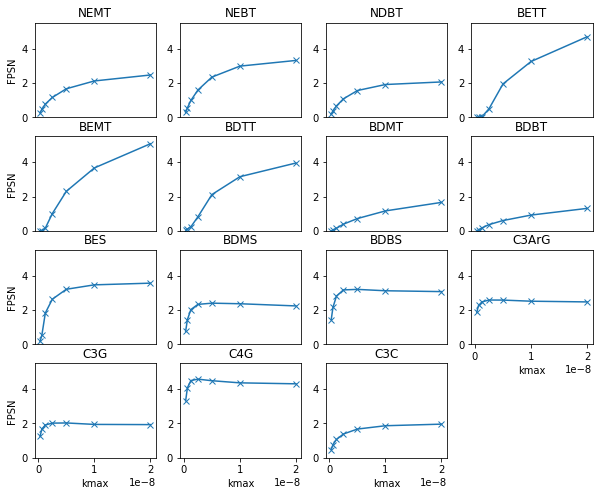

In [93]:
plt.figure(figsize=[10,8])
for ixpft in 1+np.arange(15):
    f = [np.mean(ds['FPSN'].sel(ens=ee)[:,pft==ixpft]) for ee in range(7)]
    plt.subplot(4,4,ixpft)
    plt.plot(kmax,f,'-x')
    if (ixpft>11):
        plt.xlabel('kmax')
    else:
        plt.xticks([])
    if (ixpft==1)|(ixpft==5)|(ixpft==9)|(ixpft==13):
        plt.ylabel('FPSN')
    plt.ylim([0,5.5])
    plt.title(pftnames[ixpft])